# Modèle linéaire

Considérons la cas classique d'une fonction affine :

$$y=ax+b$$

Ici, $a$ et $b$ sont des réels. Ces deux nombres définissent entièrement la courbe et permet donc d'obtenir une relation **affine** entre $x$ et $y$. En statistique, cette relation est à la base des modèles dit **linéaires**, où une variable réponse se définit comme une somme de variables explicatives où chacune de ces dernières sont multipliés par un coefficient.


## Modèle linéaire simple

![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/438px-Linear_regression.svg.png)

Dans le modèle linéaire simple (une seule variable explicative), on suppose que la variable réponse suit le modèle suivant :

$$y_i=\beta_0 + \beta_1 x_i + \varepsilon_i$$

On remarque la ressemblance avec la fonction affine présentée ci-dessus. La différence réside dans l'existence du terme aléatoire (appelé bruit) $\varepsilon_i$. Afin de considérer le modèle, il est nécessaire de se placer sous les hypothèses suivantes

$$(\mathcal{H}) : \left\{\begin{matrix}
\mathbb{E}[\varepsilon_i]=0\\ 
\text{Cov}(\varepsilon_i, \varepsilon_j)=\delta_{ij} \sigma^2
\end{matrix}\right.$$
Les différents éléments qui interviennent sont :

- $\beta_0$ : l'ordonnée à l'origine (nommée *intercept*)
- $\beta_1$ : le coefficient directeur
- $x_i$ : l'observation $i$
- $y_i$ : le $i$-ème prix
- $\varepsilon_i$ : le bruit aléatoire liée à la $i$-ème observation

La solution peut se calculer facilement via les formules fermées suivantes :

$$\hat{\beta}_1=\frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2} \qquad \hat{\beta}_0 = \hat{y} - \hat{\beta}_1 \bar{x}$$

## Modèle linéaire multiple

Dans le cas multiple (pour $p$ variables explicatives), pour la $i$-ème observation, le modèle s'écrit :

$$y_i= \beta_0 + \sum_{j=1}^p \beta_j x_{ij} + \varepsilon_i$$

Ainsi, une observation $x_i$ n'est plus une valeur, mais un **vecteur** $(x_{i1}, \dots, x_{ip})$. Il est plus commode de regrouper ces prix $y_i$ et ces vecteurs d'observations $x_i$ dans des matrices :

$$Y=X \beta + \varepsilon$$

Sous les hypothèses équivalentes du modèle simple en plus grand dimension

$$(\mathcal{H}) : \left\{\begin{matrix}
\text{rank}(X)=p\\ 
\mathbb{E}[\varepsilon]=0 \text{ et }\text{Var}(\varepsilon)=\sigma^2 I_p
\end{matrix}\right.$$

Les différents éléments qui interviennent sont :

- $\beta$ : le vecteur directeur
- $X$ : la matrice des observations
- $Y$ : le vecteur de prix
- $\varepsilon$ : le vecteur de bruit

Avec $X=( \mathbf{1}, X_1, \dots, X_n)$, $Y=(y_1, \dots, y_n)^\top$ et $\varepsilon=(\varepsilon_1, \dots, \varepsilon_n)^\top$. La solution des MCO (Moindres Carrés Ordinaires) est alors :

$$\hat{\beta}= (X^\top X)^{-1} X^\top Y$$

Vous pouvez d'ailleurs faire la démonstration de votre coté ! Pour plus d'information mathématiques, le portail de wikipédia qui est très bien fait : [lien ici](https://fr.wikipedia.org/wiki/Portail:Probabilit%C3%A9s_et_statistiques)

# Implémenter une régression linéaire 


In [2]:
#importer vos librairies 
import pandas as pd

In [6]:
#charger les données dans le drive : 2 datasets
    #price_availability.csv
    #listings_final.csv
#vérifier si tous les individus ont bien un prix 
df1 = pd.read_csv("price_availability.csv",delimiter=";")
print(len(df1))
df1.head(20)

4748696


,listing_id,day,created,available,local_currency,local_price,min_nights
0,9810829,2018-12-08,2018-09-27 06:14:10.000+0000,True,EUR,160,1
1,9810829,2018-12-08,2018-09-26 19:34:02.000+0000,True,EUR,160,1
2,20897010,2018-12-09,2018-09-27 10:38:57.000+0000,True,EUR,172,2
3,20897010,2018-12-09,2018-09-27 06:10:27.000+0000,True,EUR,172,2
4,20897010,2018-12-09,2018-09-26 19:30:25.000+0000,True,EUR,172,2
5,20897010,2018-12-09,2018-09-26 15:10:09.000+0000,True,EUR,172,2
6,4290340,2018-09-04,2018-09-27 10:50:42.000+0000,True,EUR,67,15
7,4290340,2018-09-04,2018-09-27 06:06:28.000+0000,True,EUR,67,15
8,4290340,2018-09-04,2018-09-26 19:42:08.000+0000,True,EUR,67,15
9,24574634,2018-09-21,2018-09-27 10:48:47.000+0000,False,EUR,44,5


In [7]:
df2 = pd.read_csv("listings_final.csv",delimiter=";")
print(len(df2))
df2.head(10)

1000


,Unnamed: 0,listing_id,name,type,city,neighborhood,latitude,longitude,person_capacity,beds,bedrooms,bathrooms,is_rebookable,is_new_listing,is_fully_refundable,is_host_highly_rated,is_business_travel_ready,pricing_weekly_factor,pricing_monthly_factor
0,0,28581061,La maison Clery,private_room,Paris,2e arrondissement,48.869292,2.348335,1,1,1,2.0,False,True,True,False,False,1.00,1.00
1,1,661961,studio PARIS PLACE EDITH PIAF 75020,entire_home,Paris,NaN,48.867284,2.403255,2,1,1,1.0,False,False,True,True,False,0.88,0.69
2,2,1261705,chambre privée à louer @ paris oberkampf,private_room,Paris,NaN,48.867894,2.375897,1,1,1,1.0,False,False,True,True,False,1.00,1.00
3,3,1318834,Appartement au coeur du Marais,entire_home,Paris,République,48.870370,2.358510,3,2,2,1.0,False,False,True,False,False,0.82,0.48
4,4,1677091,Lovely & Quiet flat,entire_home,Paris,Buttes-Chaumont - Belleville,48.874149,2.373700,2,1,1,1.0,False,False,True,True,False,0.95,0.90
5,5,2157481,"CENTRAL ET BIEN CONÇU,50m2+terrasse",entire_home,Paris,10e arrondissement,48.875863,2.372665,4,2,1,1.0,False,False,True,False,False,1.00,1.00
6,6,1140610,Petit atelier canal st Martin,entire_home,Paris,République,48.869362,2.368722,3,1,1,1.0,False,False,True,False,False,0.86,0.66
7,7,5662637,Sophisticated & Sunny Opulent 1BR *Opéra *4 Gu...,entire_home,Paris,Opéra - Grands Boulevards,48.872781,2.351549,2,2,1,1.0,False,False,True,True,False,0.92,0.85
8,8,5981388,Paris 16 - Elysées-Kléber-Trocadero /,entire_home,Paris,Passy,48.868952,2.289333,6,5,2,2.0,False,False,True,True,False,0.90,0.75
9,9,149534,GREAT WARM FULL APT LE HAUT MARAIS,entire_home,Paris,NaN,48.866360,2.361844,4,2,1,1.0,False,False,True,True,False,1.00,0.40


In [13]:
df = pd.merge(df1, df2, on='listing_id')
df.head(50)

,listing_id,day,created,available,local_currency,local_price,min_nights,Unnamed: 0,name,type,...,beds,bedrooms,bathrooms,is_rebookable,is_new_listing,is_fully_refundable,is_host_highly_rated,is_business_travel_ready,pricing_weekly_factor,pricing_monthly_factor
0,17757345,2018-10-14,2018-09-27 10:40:07.000+0000,False,EUR,40,1,540,En plein cœur de Belleville,private_room,...,1,1,1.0,False,False,True,False,False,1.0,1.0
1,17757345,2018-10-14,2018-09-27 06:05:54.000+0000,False,EUR,40,1,540,En plein cœur de Belleville,private_room,...,1,1,1.0,False,False,True,False,False,1.0,1.0
2,17757345,2018-10-14,2018-09-26 19:31:41.000+0000,False,EUR,40,1,540,En plein cœur de Belleville,private_room,...,1,1,1.0,False,False,True,False,False,1.0,1.0
3,17757345,2018-10-05,2018-09-27 10:40:07.000+0000,False,EUR,40,1,540,En plein cœur de Belleville,private_room,...,1,1,1.0,False,False,True,False,False,1.0,1.0
4,17757345,2018-10-05,2018-09-27 06:05:54.000+0000,False,EUR,40,1,540,En plein cœur de Belleville,private_room,...,1,1,1.0,False,False,True,False,False,1.0,1.0
5,17757345,2018-10-05,2018-09-26 19:31:41.000+0000,False,EUR,40,1,540,En plein cœur de Belleville,private_room,...,1,1,1.0,False,False,True,False,False,1.0,1.0
6,17757345,2018-09-11,2018-09-27 10:40:07.000+0000,False,EUR,42,1,540,En plein cœur de Belleville,private_room,...,1,1,1.0,False,False,True,False,False,1.0,1.0
7,17757345,2018-09-11,2018-09-27 06:05:54.000+0000,False,EUR,42,1,540,En plein cœur de Belleville,private_room,...,1,1,1.0,False,False,True,False,False,1.0,1.0
8,17757345,2018-09-11,2018-09-26 19:31:41.000+0000,False,EUR,42,1,540,En plein cœur de Belleville,private_room,...,1,1,1.0,False,False,True,False,False,1.0,1.0
9,17757345,2018-09-05,2018-09-27 10:40:07.000+0000,False,EUR,40,1,540,En plein cœur de Belleville,private_room,...,1,1,1.0,False,False,True,False,False,1.0,1.0


In [14]:
df.loc[df['listing_id'] == 17757345]

,listing_id,day,created,available,local_currency,local_price,min_nights,Unnamed: 0,name,type,...,beds,bedrooms,bathrooms,is_rebookable,is_new_listing,is_fully_refundable,is_host_highly_rated,is_business_travel_ready,pricing_weekly_factor,pricing_monthly_factor
0,17757345,2018-10-14,2018-09-27 10:40:07.000+0000,False,EUR,40,1,540,En plein cœur de Belleville,private_room,...,1,1,1.0,False,False,True,False,False,1.0,1.0
1,17757345,2018-10-14,2018-09-27 06:05:54.000+0000,False,EUR,40,1,540,En plein cœur de Belleville,private_room,...,1,1,1.0,False,False,True,False,False,1.0,1.0
2,17757345,2018-10-14,2018-09-26 19:31:41.000+0000,False,EUR,40,1,540,En plein cœur de Belleville,private_room,...,1,1,1.0,False,False,True,False,False,1.0,1.0
3,17757345,2018-10-05,2018-09-27 10:40:07.000+0000,False,EUR,40,1,540,En plein cœur de Belleville,private_room,...,1,1,1.0,False,False,True,False,False,1.0,1.0
4,17757345,2018-10-05,2018-09-27 06:05:54.000+0000,False,EUR,40,1,540,En plein cœur de Belleville,private_room,...,1,1,1.0,False,False,True,False,False,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,17757345,2018-10-12,2018-09-27 10:40:07.000+0000,False,EUR,40,1,540,En plein cœur de Belleville,private_room,...,1,1,1.0,False,False,True,False,False,1.0,1.0
379,17757345,2018-10-12,2018-09-27 06:05:54.000+0000,False,EUR,40,1,540,En plein cœur de Belleville,private_room,...,1,1,1.0,False,False,True,False,False,1.0,1.0
380,17757345,2018-10-12,2018-09-26 19:31:41.000+0000,False,EUR,40,1,540,En plein cœur de Belleville,private_room,...,1,1,1.0,False,False,True,False,False,1.0,1.0
381,17757345,2018-09-27,2018-09-27 10:40:07.000+0000,False,EUR,42,1,540,En plein cœur de Belleville,private_room,...,1,1,1.0,False,False,True,False,False,1.0,1.0


In [20]:
df['moy_local_price'] = df.groupby('listing_id')['local_price'].transform('mean')
df.head(500)

,listing_id,day,created,available,local_currency,local_price,min_nights,Unnamed: 0,name,type,...,bedrooms,bathrooms,is_rebookable,is_new_listing,is_fully_refundable,is_host_highly_rated,is_business_travel_ready,pricing_weekly_factor,pricing_monthly_factor,moy_local_price
0,17757345,2018-10-14,2018-09-27 10:40:07.000+0000,False,EUR,40,1,540,En plein cœur de Belleville,private_room,...,1,1.0,False,False,True,False,False,1.00,1.00,41.697128
1,17757345,2018-10-14,2018-09-27 06:05:54.000+0000,False,EUR,40,1,540,En plein cœur de Belleville,private_room,...,1,1.0,False,False,True,False,False,1.00,1.00,41.697128
2,17757345,2018-10-14,2018-09-26 19:31:41.000+0000,False,EUR,40,1,540,En plein cœur de Belleville,private_room,...,1,1.0,False,False,True,False,False,1.00,1.00,41.697128
3,17757345,2018-10-05,2018-09-27 10:40:07.000+0000,False,EUR,40,1,540,En plein cœur de Belleville,private_room,...,1,1.0,False,False,True,False,False,1.00,1.00,41.697128
4,17757345,2018-10-05,2018-09-27 06:05:54.000+0000,False,EUR,40,1,540,En plein cœur de Belleville,private_room,...,1,1.0,False,False,True,False,False,1.00,1.00,41.697128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2581464,2018-11-13,2018-09-27 06:06:46.000+0000,True,EUR,78,2,176,PARIS village - B&B avec jardin privatif,private_room,...,1,1.0,False,False,True,False,False,0.82,0.61,80.724409
496,2581464,2018-11-13,2018-09-26 19:38:27.000+0000,True,EUR,78,2,176,PARIS village - B&B avec jardin privatif,private_room,...,1,1.0,False,False,True,False,False,0.82,0.61,80.724409
497,2581464,2018-09-26,2018-09-27 10:40:54.000+0000,False,EUR,79,2,176,PARIS village - B&B avec jardin privatif,private_room,...,1,1.0,False,False,True,False,False,0.82,0.61,80.724409
498,2581464,2018-09-26,2018-09-26 19:38:27.000+0000,False,EUR,79,2,176,PARIS village - B&B avec jardin privatif,private_room,...,1,1.0,False,False,True,False,False,0.82,0.61,80.724409


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402616 entries, 0 to 402615
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   listing_id                402616 non-null  int64  
 1   day                       402616 non-null  object 
 2   created                   402616 non-null  object 
 3   available                 402616 non-null  bool   
 4   local_currency            402616 non-null  object 
 5   local_price               402616 non-null  int64  
 6   min_nights                402616 non-null  int64  
 7   Unnamed: 0                402616 non-null  int64  
 8   name                      402616 non-null  object 
 9   type                      402616 non-null  object 
 10  city                      402616 non-null  object 
 11  neighborhood              377260 non-null  object 
 12  latitude                  402616 non-null  float64
 13  longitude                 402616 non-null  f

In [32]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

neighborhood_label_encoder, city_label_encoder = LabelEncoder(),LabelEncoder()

df.neighborhood =neighborhood_label_encoder.fit_transform(df.neighborhood)
df.city=city_label_encoder.fit_transform(df.city)
print(city_label_encoder.classes_)
print(neighborhood_label_encoder.classes_)
print('-----------------------')
print(df.city)
print(df.neighborhood)

[0 1 2]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
-----------------------
0         2
1         2
2         2
3         2
4         2
         ..
402611    2
402612    2
402613    2
402614    2
402615    2
Name: city, Length: 402616, dtype: int64
0         34
1         34
2         34
3         34
4         34
          ..
402611    19
402612    19
402613    19
402614    19
402615    19
Name: neighborhood, Length: 402616, dtype: int64


## Données d'entrée

L'objectif ici est de charger les données pour créer les matrices $X$ et $Y$ du modèle linéaire. **Attention**, il n'est pas nécessaire de rajouter le vecteur colonne $\mathbf{1}$ en première colonne, car *scikit-learn* le fait automatiquement !

In [41]:
#définir 2 variables de travail
#X := les features à utiliser 
#Y := la target (prix)
X = df[['beds', 'bedrooms', 'neighborhood', 'city']]
Y = df['moy_local_price']

In [42]:
#construire l'ensemble de donnée prix 
#
#    INDICE 
# 
# récupérer les prix des ID dans le dataset de prix 
# 🚧 il y a plusieurs prix dans le dataset 🚧

En *Machine Learning*, on a l'habitude de couper l'ensemble de données en deux sous-ensembles :

- Un ensemble d'entraînement (*train set*), sur lequel le modèle va être calibré.
- Un ensemble de test (*test set*), qui ne sera pas utilisé pendant le calibrage mais permettra de vérifier l'aptitude du modèle à généraliser sur de nouvelles observations inconnues.

En général, on découpe l'ensemble de données (*split*) en prenant $\alpha \%$ de l'ensemble pour entraînement et $1-\alpha \%$ comme test. Dans la plus part des cas, on considère que $\alpha=10,20 ou 30\%$.

In [43]:
from sklearn.model_selection import train_test_split
#utiliser la méthode split de sklearn en splitant avec un alpha=30 et un random state=42 
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=42)
#zafficher la shape de vos données 
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((281831, 4), (120785, 4), (281831,), (120785,))

## Entraînement

Pour information, *scikit-learn* utilise le solveur OLS (Ordinary Least Squares) de *numpy*.

In [49]:
#créer l'objet de régression et entrainer le sur notre ensemble d'entraînement
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
from pprint import pprint
#affichage des parametres par defaut 
print('Parameters currently in use:\n')
pprint(linear_model.get_params())

Parameters currently in use:

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}


In [50]:
#entrainer le sur notre ensemble d'entraînement
target = np.array(y_train)
linear_model.fit(x_train.values,target.ravel());

On affiche le vecteur des coefficients pour interpréter rapidement le modèle.

In [59]:
#afficher les coefficients
print('Coefficients beta_j',linear_model.coef_)
print('Coefficients INTERCEPT beta_0 : ',linear_model.intercept_)

Coefficients beta_j [-1.27173059 94.39862413  0.61276813 76.95482158]
Coefficients INTERCEPT beta_0 :  -97.83711580372193


#que remarquez vous ? 
le prix est determiné par le nombre de chambre et l'emplacement

## Validation du modèle

### Le coefficient de détermination $R^2$

Par la suite, nous ferons l'hypothèse de gaussianité sur les bruits. Dans l'idée, nous aimerions obtenir une valeur numérique qui nous indique à quel point la régression linéaire a un sens sur nos données. Pour cela, introduisons les notations suivantes :

- $SCT=\|Y-\hat{y} \mathbf{1}\|^2$ est la somme des carrés totaux
- $SCE=\|\hat{Y}-\hat{y} \mathbf{1}\|^2$ est la somme des carrés expliqués
- $SCR=\|\hat{\varepsilon}\|^2$ est la somme des carrés résiduels

L'idée est de décomposer la somme des carrés totaux comme la somme des carrés que le modèle explique, en plus de la somme des carrés qui sont liés aux résidus (et donc que le modèle ne peut pas expliquer). On voit donc ici l'intérêt de calculer un coefficient à partir du $SCE$. Puisque l'on a la relation suivante :

$$SCT=SCE+SCR \text{ alors } 1=\frac{SCE}{SCT}+\frac{SCR}{SCT}$$

Plus les résidus sont petits (et donc la régression est "bonne"), plus $SCR$ devient petit et donc $SCE$ devient grand. Le schéma inverse s'opère de la même façon. Dans le meilleur des cas, on obtient $SCR=0$ et donc $SCE=SCT$ d'où le premier membre vaut $1$. Dans le cas contraite, $SCE=0$ et automatiquement, le premier membre est nul. C'est ainsi que l'on définit le coefficient de détermination $R^2$ comme 
$$R^2=\frac{SCE}{SCT}=1-\frac{SCR}{SCT}$$
Ainsi, $R^2 \in [0,1]$. Plus $R^2$ est proche de $1$, plus la régression linéaire a du sens. Au contraire, si $R^2$ est proche de $0$, le modèle linéaire possède un faible pouvoir explicatif.

In [63]:
#faire une prediction sur X
Y_pred=linear_model.predict(x_train)
Y_pred

C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([261.8887004 , 162.0675517 , 162.0675517 , ..., 170.03353745,
       438.99715978, 454.31636313])

In [68]:
#afficher l'erreur des moindres carrées sur l'ensemble d'entrainement ainsi que le R2
from sklearn.metrics import mean_squared_error, r2_score
Mean_squared_error = mean_squared_error(y_train, Y_pred)
Mean_squared_error

25097.836958895175

In [71]:
R2 = r2_score(y_train, Y_pred)
R2

0.26283783055517207

## Bonus : Analyse de l'homoscédasticité

L'analyse de l'homoscédasticité est primordiale : c'est en particulier elle qui nous permet de vérifier, à partir des résidus, si les bruits vérifient bien l'hypothèse $(\mathcal{H})$. On calcule donc les **résidus studentisés**.

$$t_i^*=\frac{\hat{\varepsilon}_i}{\hat{\sigma}_{(i)} \sqrt{1-h_{ii}}}$$
Avec $h_{ii}=\{X(X^\top X)^{-1} X^\top\}_{ii}=H_{ii}$ la matrice de projection sur l'hyperplan des variables. Plus précisément, $H$ est la matrice qui projette $Y$ sur l'espace engendré par les variables, soit $\hat{Y}=HY$. De même, on considère $\hat{\sigma}_{(i)}$ l'estimateur de la variance du bruit en supprimant l'observation $i$ (par une méthode de validation croisée Leave-One-Out que nous ne détaillerons pas ici).

Dans ce cas, on peut montrer que les résidus studentisés suivent une loi de Student à $n-p-1$ degrés de liberté.

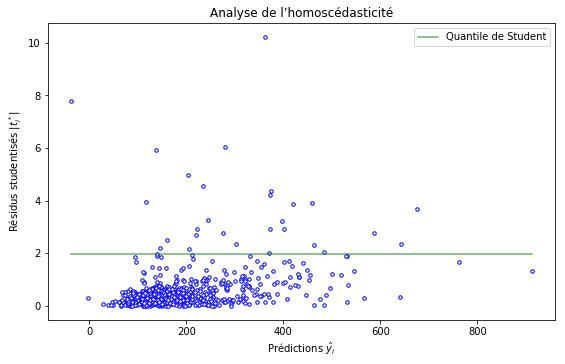

In [ ]:
#analyser le code ci-dessous 
import scipy
Y_pred = regr.predict(X_train)
n = X_train.shape[0]
p = 4
residuals = np.abs(y_train - Y_pred)
H = np.matmul(X_train, np.linalg.solve(np.dot(X_train.T, X_train), X_train.T))
std_hat = np.dot(residuals, residuals) / (n - p)
standart_residuals = np.asarray([residuals[i] / np.sqrt(std_hat * (1 - H[i, i])) for i in range(len(residuals))])
student_residuals = np.asarray([ standart_residuals[i] * np.sqrt((n - p - 1) / (n - p - standart_residuals[i]**2)) for i in range(n) ])
cook = np.asarray([ H[i, i] * student_residuals[i] / (X_train.shape[1] * (1 - H[i, i])) for i in range(n) ])

plt.figure(figsize=(20, 12))
plt.subplot(221)
plt.scatter(Y_pred, student_residuals, s=12, c="white", edgecolors="blue")
plt.plot([min(Y_pred), max(Y_pred)], [ scipy.stats.t.ppf(q=0.975, df=n-p-1), scipy.stats.t.ppf(q=0.975, df=n-p-1)], color="green", alpha=0.6, label="Quantile de Student")
plt.title("Analyse de l’homoscédasticité")
plt.xlabel("Prédictions $\hat{y}_i$")
plt.ylabel("Résidus studentisés $|t_i^*|$")
plt.legend()